In [1]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# remove warnings
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

# **1. Loading Dataset**

In [2]:
# Loading the data
new_data = pd.read_csv("/kaggle/input/seperated-data/India_Delhi.csv")

# print the shape
print(new_data.shape)

#runs the first 5 rows
new_data.head()

(2399, 12)


,Date,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City
0,2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,NaN,NaN,NaN,NaN,India_Delhi
1,2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,NaN,NaN,NaN,NaN,India_Delhi
2,2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,NaN,NaN,NaN,NaN,India_Delhi
3,2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,NaN,NaN,NaN,NaN,India_Delhi
4,2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,NaN,NaN,NaN,NaN,India_Delhi


In [3]:
# Find the minimum and maximum dates
min_date = new_data['Date'].min()
max_date = new_data['Date'].max()

print('Minimum date:', min_date)
print('Maximum date:', max_date)

Minimum date: 2014-12-29
Maximum date: 2023-10-01


In [4]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2399 entries, 0 to 2398
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2399 non-null   object 
 1   co            2399 non-null   float64
 2   no2           2399 non-null   float64
 3   o3            2399 non-null   float64
 4   pm10          2398 non-null   float64
 5   pm25          2398 non-null   float64
 6   so2           2399 non-null   float64
 7   humidity      1698 non-null   float64
 8   pressure      1698 non-null   float64
 9   temperature   1698 non-null   float64
 10  wind-speed    1629 non-null   float64
 11  Country_City  2399 non-null   object 
dtypes: float64(10), object(2)
memory usage: 225.0+ KB


In [5]:
new_data.describe()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed
count,2399.000000,2399.000000,2399.000000,2398.000000,2398.000000,2399.000000,1698.000000,1698.000000,1698.000000,1629.000000
mean,9.325594,16.870946,9.480700,131.572143,164.397832,5.702751,60.708304,985.184923,26.338869,1.101964
std,3.715709,7.805715,4.829603,77.174642,64.829240,2.289821,17.138084,10.022854,6.631277,0.493156
min,0.100000,5.000000,2.400000,12.000000,30.000000,1.700000,13.000000,743.000000,6.200000,0.300000
25%,7.050000,10.600000,6.000000,82.000000,123.000000,4.000000,48.500000,979.800000,22.100000,0.800000
50%,8.400000,15.800000,8.200000,120.000000,160.000000,5.300000,63.000000,983.900000,28.600000,1.000000
75%,10.700000,21.500000,11.800000,160.000000,189.000000,7.100000,74.000000,990.400000,31.100000,1.300000
max,30.600000,66.500000,40.300000,999.000000,577.000000,19.800000,99.100000,1020.500000,38.000000,4.600000


In [6]:
# Investigate all the elements whithin each Feature

for column in new_data:
    # Handle numerical and string columns differently
    if new_data[column].dtype == 'object':  # Check if column is of object type
        unique_vals = new_data[column].unique()  # pandas unique for strings
    else:
        unique_vals = np.unique(new_data[column])  # numpy unique for numerical types

    nr_values = len(unique_vals)
    if nr_values < 14:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Date :2397
The number of values for feature co :200
The number of values for feature no2 :328
The number of values for feature o3 :226
The number of values for feature pm10 :320
The number of values for feature pm25 :309
The number of values for feature so2 :116
The number of values for feature humidity :602
The number of values for feature pressure :300
The number of values for feature temperature :264
The number of values for feature wind-speed :33
The number of values for feature Country_City :1 -- ['India_Delhi']


In [7]:
new_data.isna().sum()

Date              0
co                0
no2               0
o3                0
pm10              1
pm25              1
so2               0
humidity        701
pressure        701
temperature     701
wind-speed      770
Country_City      0
dtype: int64

## **1.2 - Function**

In [8]:
print(os.listdir('/kaggle/usr/lib/function'))

['__results__.html', '__notebook__.ipynb', 'function.py', '__output__.json', 'custom.css']


In [9]:
import sys
sys.path.append("/kaggle/usr/lib/function")  # Add directory to the path

import function as fn

In [10]:
# Use the functions
new_data1 = fn.prepare_datetime_index(new_data, date_column='Date')
new_data1.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City
Date,,,,,,,,,,,
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,NaN,NaN,NaN,NaN,India_Delhi
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,NaN,NaN,NaN,NaN,India_Delhi
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,NaN,NaN,NaN,NaN,India_Delhi
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,NaN,NaN,NaN,NaN,India_Delhi
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,NaN,NaN,NaN,NaN,India_Delhi


In [11]:
# Use the functions
new_data2 = fn.fill_pollutant_values(new_data1)
print(new_data2.isna().sum())

co              0
no2             0
o3              0
pm10            0
pm25            0
so2             0
humidity        0
pressure        0
temperature     0
wind-speed      0
Country_City    0
dtype: int64


**Check**

In [12]:
# Create a complete range of dates
full_range = pd.date_range(start=new_data2.index.min(), end=new_data2.index.max())

# Find missing dates
missing_dates = full_range.difference(new_data2.index)
print("Missing Dates:")
print(missing_dates)

Missing Dates:
DatetimeIndex(['2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
               '2015-07-10', '2015-07-11', '2015-07-12', '2015-07-13',
               '2015-07-14', '2015-07-15',
               ...
               '2022-03-18', '2022-03-19', '2022-03-20', '2022-03-21',
               '2022-03-22', '2022-03-23', '2022-03-24', '2022-03-25',
               '2022-03-26', '2022-03-27'],
              dtype='datetime64[ns]', length=802, freq=None)


In [13]:
new_data3 = fn.impute_missing_dates(new_data2)

In [14]:
# Create a complete range of dates
full_range = pd.date_range(start=new_data3.index.min(), end=new_data3.index.max())

# Find missing dates
missing_dates = full_range.difference(new_data3.index)
print("Missing Dates:")
print(missing_dates)

Missing Dates:
DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [15]:
duplicates = new_data3.index[new_data3.index.duplicated()]
print(f"Duplicate indexes: {duplicates}")

Duplicate indexes: DatetimeIndex([], dtype='datetime64[ns]', freq='D')


## **1.3.Normal AQI count, After Normal AQI count Smoothing AQI(IQR, Z-score, Rolling), (Preprocess Pollution --> Smooth Pollution --> Calculate smooth aqi).**

In [16]:
new_data4 = fn.calculate_aqi(new_data3, subindex_columns=['co', 'no2', 'o3', 'pm10', 'pm25', 'so2'])

In [17]:
new_data4.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City,Checks,AQI
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,307.0
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,367.0
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,202.0
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,382.0
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,172.0


In [18]:
new_data4.shape

(3199, 13)

 After Normal AQI count Smoothing AQI(IQR, Z-score, Rolling)

In [19]:
# Apply the outlier handling function to the 'AQI' column only
new_data4['AQI_smoothed_iqr'] = fn.handle_aqi_outliers(new_data4['AQI'], method='iqr')
new_data4['AQI_smoothed_zscore'] = fn.handle_aqi_outliers(new_data4['AQI'], method='zscore')
new_data4['AQI_smoothed_rolling'] = fn.handle_aqi_outliers(new_data4['AQI'], method='rolling')

In [20]:
new_data4.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City,Checks,AQI,AQI_smoothed_iqr,AQI_smoothed_zscore,AQI_smoothed_rolling
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,307.0,307.0,307.0,307.0
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,367.0,367.0,367.0,367.0
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,202.0,202.0,202.0,202.0
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,382.0,382.0,158.0,382.0
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,172.0,172.0,172.0,172.0


(Preprocess Pollution --> Smooth Pollution --> Calculate smooth aqi)

In [21]:
new_smooth = fn.calculate_smooth_aqi(new_data3, columns=['co', 'no2', 'o3', 'pm10', 'pm25', 'so2'])
new_smooth.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City,AQI_Smooth
2014-12-29,11.50,29.400000,5.366667,182.333333,195.666667,6.000000,60.691097,985.187382,26.3352,1.102459,India_Delhi,195.666667
2014-12-30,11.50,29.400000,5.366667,182.333333,195.666667,6.000000,60.691097,985.187382,26.3352,1.102459,India_Delhi,195.666667
2014-12-31,11.50,29.400000,5.366667,182.333333,195.666667,6.000000,60.691097,985.187382,26.3352,1.102459,India_Delhi,195.666667
2015-01-01,11.50,29.400000,5.366667,182.333333,195.666667,6.000000,60.691097,985.187382,26.3352,1.102459,India_Delhi,195.666667
2015-01-02,11.25,26.616667,5.816667,166.000000,177.000000,5.733333,60.691097,985.187382,26.3352,1.102459,India_Delhi,177.000000


**AQI (normal, smooth_iqr, smooth_zscore, smooth_rolling, smooth)**

<Axes: >

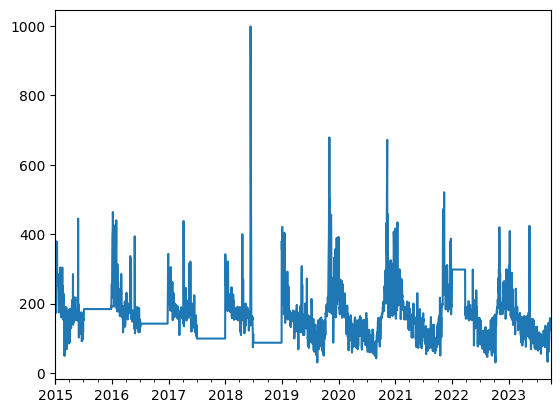

In [22]:
#normal
aqi_normal = new_data4['AQI']
aqi_normal.plot()

<Axes: >

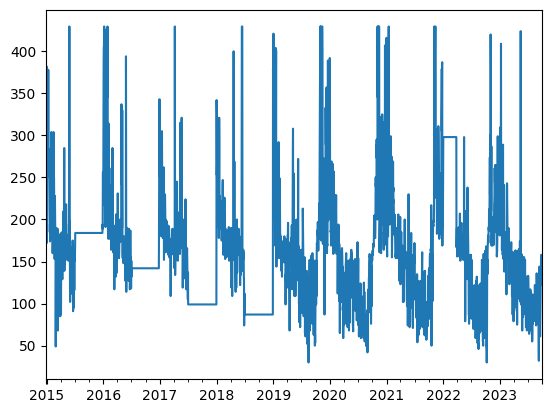

In [23]:
#smooth_iqr
aqi_smooth_iqr = new_data4['AQI_smoothed_iqr']
aqi_smooth_iqr.plot()

<Axes: >

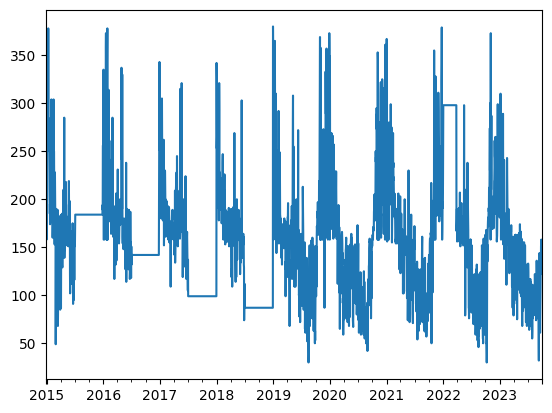

In [24]:
#smooth_zscore
aqi_smooth_zscore = new_data4['AQI_smoothed_zscore']
aqi_smooth_zscore.plot()

<Axes: >

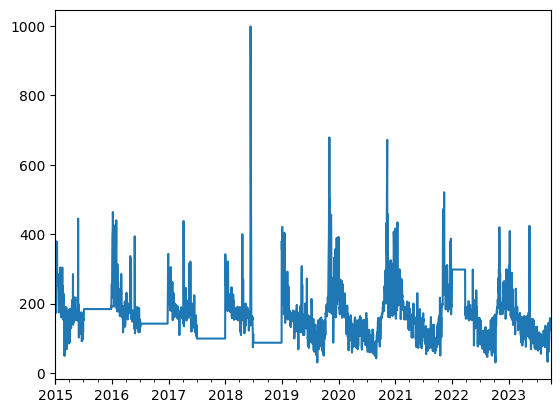

In [25]:
#smooth_rolling
aqi_smooth_rolling = new_data4['AQI_smoothed_rolling']
aqi_smooth_rolling.plot()

<Axes: >

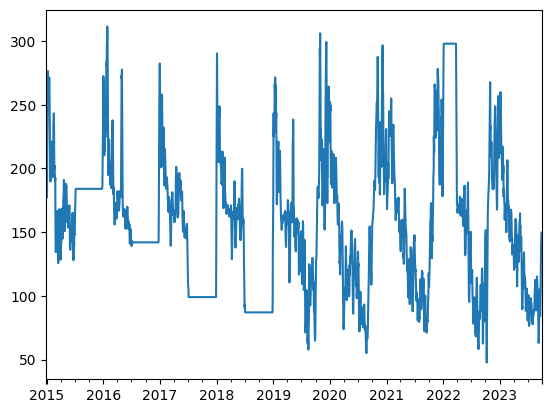

In [26]:
#smooth
aqi_smooth = new_smooth['AQI_Smooth']
aqi_smooth.plot()

# **2. Split and Preprocess**

## **2.1. Splitting & Preprocessing the Raw Data(Normal AQI)**

Normal AQI

In [27]:
new_data4.head(8)

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City,Checks,AQI,AQI_smoothed_iqr,AQI_smoothed_zscore,AQI_smoothed_rolling
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,307.0,307.0,307.0,307.0
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,367.0,367.0,367.0,367.0
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,202.0,202.0,202.0,202.0
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,382.0,382.0,158.0,382.0
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,172.0,172.0,172.0,172.0
2015-01-03,14.3,27.8,5.2,98.0,179.0,5.6,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,179.0,179.0,179.0,179.0
2015-01-04,12.6,19.5,5.9,120.0,195.0,2.6,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,195.0,195.0,195.0,195.0
2015-01-05,13.1,19.1,8.4,114.0,185.0,2.5,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,185.0,185.0,185.0,185.0


In [28]:
new_data4.columns

Index(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed', 'Country_City', 'Checks', 'AQI',
       'AQI_smoothed_iqr', 'AQI_smoothed_zscore', 'AQI_smoothed_rolling'],
      dtype='object')

In [29]:
aqi_normal = new_data4.copy()

In [30]:
aqi_normal = aqi_normal.drop([ 'humidity', 'pressure',
       'temperature', 'wind-speed', 'Country_City', 'Checks', 
        'AQI_smoothed_iqr', 'AQI', 'AQI_smoothed_rolling'], axis = 1)

In [31]:
aqi_normal.head()

,co,no2,o3,pm10,pm25,so2,AQI_smoothed_zscore
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,307.0
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,367.0
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,202.0
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,158.0
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,172.0


In [32]:
def new_data_to_X_y(new_data, window_size, train_pct, val_pct, test_pct):
    
    new_data_as_np = new_data.to_numpy()
    
    # Split features and target
    features = new_data_as_np[:, :-1]  # All columns except the last one
    target = new_data_as_np[:, -1]     # Only the AQI column
    
    # Split data based on percentages
    total_len = len(features)
    train_end = int(train_pct * total_len)
    val_end = train_end + int(val_pct * total_len)
    
    # Prepare train, val, and test splits for both features and target
    train_features = features[:train_end]
    train_target = target[:train_end]
    
    val_features = features[train_end:val_end]
    val_target = target[train_end:val_end]
    
    test_features = features[val_end:]
    test_target = target[val_end:]
    
    # Helper function to create X and y
    def create_X_y(feature_data, target_data):
        X, y = [], []
        for i in range(len(feature_data) - window_size):
            # Create sequence of all features
            sequence = feature_data[i:i + window_size]
            X.append(sequence)
            # Get the target AQI value
            y.append(target_data[i + window_size])
        return np.array(X), np.array(y)
    
    
    X_train, y_train = create_X_y(train_features, train_target)
    X_val, y_val = create_X_y(val_features, val_target)
    X_test, y_test = create_X_y(test_features, test_target)
    
    return (X_train, y_train), (X_val, y_val), (X_test, y_test)

In [33]:
#passing data to function

# WINDOW_SIZE = 6
# train_pct=0.7
# val_pct=0.2
# test_pct=0.1
(X_train1, y_train1), (X_val1, y_val1), (X_test1, y_test1) = new_data_to_X_y(aqi_normal, 6, 0.75, 0.15, 0.1)

# shapes
print("Train shapes:", X_train1.shape, y_train1.shape)
print("Validation shapes:", X_val1.shape, y_val1.shape)
print("Test shapes:", X_test1.shape, y_test1.shape)

Train shapes: (2393, 6, 6) (2393,)
Validation shapes: (473, 6, 6) (473,)
Test shapes: (315, 6, 6) (315,)


## **2.2. Model Training & Testing**

In [34]:
# libraries for building model and testing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

# LSTM(normal)

In [35]:
model5 = Sequential()
model5.add(InputLayer((6, 6)))  # 6 timestamps, 6 features
model5.add(LSTM(32, activation='relu', return_sequences=False))  # Single LSTM layer
model5.add(Dense(16, activation='relu')) 
model5.add(Dense(1, activation='linear'))  

cp5 = ModelCheckpoint('/kaggle/working/model5.keras', save_best_only=True)

model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), 
               metrics=[RootMeanSquaredError()])

model5.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=50, 
           callbacks=[cp5])

Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 4608.6436 - root_mean_squared_error: 66.5621 - val_loss: 1587.7042 - val_root_mean_squared_error: 39.8460
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1408.2306 - root_mean_squared_error: 37.5008 - val_loss: 1750.8013 - val_root_mean_squared_error: 41.8426
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1371.5861 - root_mean_squared_error: 36.9445 - val_loss: 1351.2848 - val_root_mean_squared_error: 36.7598
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1070.3684 - root_mean_squared_error: 32.6734 - val_loss: 1393.7214 - val_root_mean_squared_error: 37.3326
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1134.9536 - root_mean_squared_error: 33.6293 - val_loss: 1352.2981 - val_root_mean_squared_error: 36.7736
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1170.1190 - root_mean_squared_error: 34.0745 - val_loss: 1323.9921 - val_root_mean_squared_error: 36.3867
Epoch 7/50
75/75

In [36]:
from tensorflow.keras.models import load_model
model5 = load_model('/kaggle/working/model5.keras')

In [37]:
# Evaluate the model on the train data
train_result = model5.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 17.4153
Mean Squared Error (MSE): 866.9239
Root Mean Squared Error (RMSE): 29.4436
R-squared (Accuracy): 0.7164


In [38]:
# Evaluate the model on the validation data
val_result = model5.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 21.9193
Mean Squared Error (MSE): 1051.2899
Root Mean Squared Error (RMSE): 32.4236
R-squared (Accuracy): 0.8479


In [39]:
# Evaluate the model on the test data
test_result = model5.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 20.4368
Mean Squared Error (MSE): 738.7746
Root Mean Squared Error (RMSE): 27.1804
R-squared (Accuracy): 0.7395


In [40]:
train_predictions = model5.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Train Predictions,Actuals
0,217.762909,195.0
1,213.502060,185.0
2,199.351608,208.0
3,264.347046,290.0
4,268.797760,267.0
...,...,...
2388,85.655136,54.0
2389,72.704384,85.0
2390,94.260002,97.0
2391,100.402786,74.0


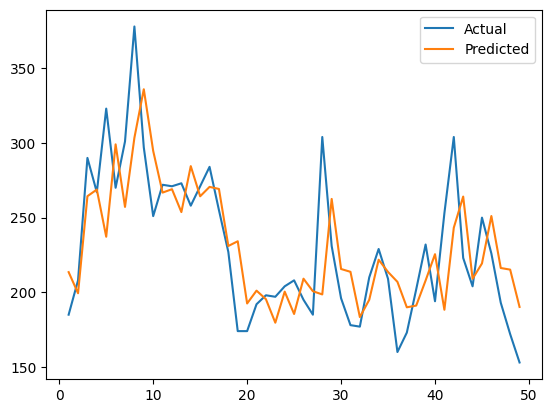

In [41]:
plt.plot(train_results['Actuals'][1:50], label='Actual')
plt.plot(train_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [42]:
val_predictions = model5.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Train Predictions':val_predictions, 'Actuals':y_val1})
val_results

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Train Predictions,Actuals
0,89.153976,85.0
1,85.009903,71.0
2,75.309258,89.0
3,96.509521,99.0
4,96.357483,80.0
...,...,...
468,180.383255,193.0
469,199.744400,199.0
470,198.424362,197.0
471,203.942032,197.0


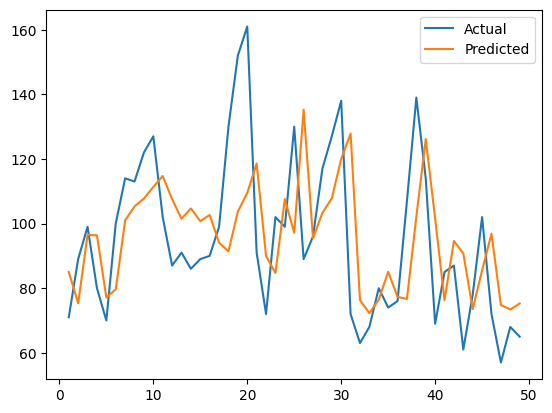

In [43]:
plt.plot(val_results['Actuals'][1:50], label='Actual')
plt.plot(val_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [44]:
test_predictions = model5.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Train Predictions':test_predictions, 'Actuals':y_test1})
test_results

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Train Predictions,Actuals
0,194.217667,190.0
1,182.960464,177.0
2,166.779877,172.0
3,165.108994,170.0
4,165.289032,197.0
...,...,...
310,149.404526,134.0
311,130.712509,144.0
312,144.516098,155.0
313,153.388382,155.0


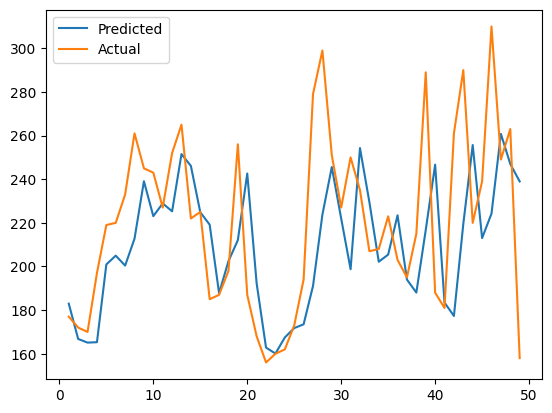

In [45]:
plt.plot(test_results['Train Predictions'][1:50], label='Predicted')
plt.plot(test_results['Actuals'][1:50], label='Actual')
plt.legend()
plt.show()

# **GRU(Normal)**

In [46]:
model6 = Sequential()
model6.add(InputLayer((6, 6)))  # 6 timestamps, 6 features
model6.add(BatchNormalization())  # Normalize inputs
model6.add(GRU(64, activation='relu', return_sequences=True))  # GRU layer
model6.add(Dropout(0.3))  # Dropout for regularization
model6.add(Dense(32, activation='relu'))  
model6.add(Dense(1, activation='linear'))  

cp6 = ModelCheckpoint('/kaggle/working/model6.keras', save_best_only=True)

model6.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), 
               metrics=[RootMeanSquaredError()])

model6.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=50, 
           callbacks=[cp6])

Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 26201.4121 - root_mean_squared_error: 161.8248 - val_loss: 19668.4375 - val_root_mean_squared_error: 140.2442
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14221.1660 - root_mean_squared_error: 119.0510 - val_loss: 13139.9785 - val_root_mean_squared_error: 114.6297
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8194.2080 - root_mean_squared_error: 90.4726 - val_loss: 11776.5625 - val_root_mean_squared_error: 108.5199
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6156.6616 - root_mean_squared_error: 78.4440 - val_loss: 11030.7217 - val_root_mean_squared_error: 105.0272
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5432.9004 - root_mean_squared_error: 73.6997 - val_loss: 10357.4756 - val_root_mean_squared_error: 101.7717
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4460.8677 - root_mean_squared_error: 66.7614 - val_loss: 9570.0000 - val_root_mean_squared_error: 97.8264
E

# Bidirectional LSTM(Normal)

In [47]:
model7 = Sequential()
model7.add(InputLayer((6, 6)))  # 6 timestamps, 6 features
model7.add(BatchNormalization())  # Normalize inputs
model7.add(GRU(64, activation='relu', return_sequences=True))  # GRU layer
model7.add(Dropout(0.3)) 
model7.add(Dense(32, activation='relu'))  
model7.add(Dense(1, activation='linear'))  

cp7 = ModelCheckpoint('/kaggle/working/model7.keras', save_best_only=True)

model7.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), 
               metrics=[RootMeanSquaredError()])

model6.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=50, 
           callbacks=[cp7])

Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3243.0625 - root_mean_squared_error: 56.9279 - val_loss: 7234.1680 - val_root_mean_squared_error: 85.0539
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3263.0986 - root_mean_squared_error: 57.0948 - val_loss: 7132.5078 - val_root_mean_squared_error: 84.4542
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3220.3059 - root_mean_squared_error: 56.7275 - val_loss: 7637.9385 - val_root_mean_squared_error: 87.3953
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3459.5774 - root_mean_squared_error: 58.7955 - val_loss: 7336.0776 - val_root_mean_squared_error: 85.6509
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3206.8379 - root_mean_squared_error: 56.6038 - val_loss: 7151.4419 - val_root_mean_squared_error: 84.5662
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3266.3066 - root_mean_squared_error: 57.1416 - val_loss: 7353.8169 - val_root_mean_squared_error: 85.7544
Epoch 7/50
75/75

# Hybrid CNN + LSTM

In [48]:
model8 = Sequential()
model8.add(InputLayer((6, 6)))  # 6 timestamps, 6 features
model8.add(Conv1D(32, kernel_size=2, activation='relu'))  # 1D Convolutional Layer
model8.add(MaxPooling1D(pool_size=2))  # Max Pooling
model8.add(LSTM(64, activation='relu', return_sequences=False))  
model8.add(Dropout(0.3))  
model8.add(Dense(32, activation='relu'))  
model8.add(Dense(1, activation='linear'))  

cp8 = ModelCheckpoint('/kaggle/working/model8.keras', save_best_only=True)

model8.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), 
               metrics=[RootMeanSquaredError()])

model8.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=50, 
           callbacks=[cp8])

Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 15121.8115 - root_mean_squared_error: 120.2364 - val_loss: 2116.1287 - val_root_mean_squared_error: 46.0014
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2287.8433 - root_mean_squared_error: 47.8167 - val_loss: 2498.8872 - val_root_mean_squared_error: 49.9889
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2028.3787 - root_mean_squared_error: 44.9958 - val_loss: 2300.7363 - val_root_mean_squared_error: 47.9660
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2191.2075 - root_mean_squared_error: 46.6274 - val_loss: 2122.4126 - val_root_mean_squared_error: 46.0696
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1946.4415 - root_mean_squared_error: 44.0889 - val_loss: 1822.9498 - val_root_mean_squared_error: 42.6960
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1976.6404 - root_mean_squared_error: 44.4337 - val_loss: 2428.8210 - val_root_mean_squared_error: 49.2831
Epoch 7/50
75/

In [49]:
from tensorflow.keras.models import load_model
model8 = load_model('/kaggle/working/model8.keras')

In [50]:
# Evaluate the model on the train data
train_result = model8.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 23.3610
Mean Squared Error (MSE): 1361.7455
Root Mean Squared Error (RMSE): 36.9018
R-squared (Accuracy): 0.5545


In [51]:
# Evaluate the model on the validation data
val_result = model8.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 33.4461
Mean Squared Error (MSE): 1822.9500
Root Mean Squared Error (RMSE): 42.6960
R-squared (Accuracy): 0.7362


In [52]:
# Evaluate the model on the test data
test_result = model8.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 24.7555
Mean Squared Error (MSE): 1084.9739
Root Mean Squared Error (RMSE): 32.9389
R-squared (Accuracy): 0.6174


# **Advanced Stacked GRU + Dense**

In [53]:
model9 = Sequential()
model9.add(InputLayer((6, 6)))  # 6 timestamps, 6 features
model9.add(BatchNormalization())  # Normalize inputs
model9.add(GRU(128, activation='relu', return_sequences=True))  # GRU layer
model9.add(Dropout(0.3))  # Dropout for regularization
model9.add(GRU(64, activation='relu', return_sequences=False))  # Second GRU layer
model9.add(Dense(32, activation='relu'))  # Fully connected layer
model9.add(Dense(16, activation='relu'))  # Second dense layer
model9.add(Dense(1, activation='linear'))  # Output layer

cp9 = ModelCheckpoint('/kaggle/working/model9.keras', save_best_only=True)

model9.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), 
               metrics=[RootMeanSquaredError()])

model9.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=50, 
           callbacks=[cp9])

Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 22609.2480 - root_mean_squared_error: 149.4405 - val_loss: 5002.8550 - val_root_mean_squared_error: 70.7309
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2524.0261 - root_mean_squared_error: 50.1080 - val_loss: 1755.1167 - val_root_mean_squared_error: 41.8941
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1561.7358 - root_mean_squared_error: 39.4903 - val_loss: 1746.8092 - val_root_mean_squared_error: 41.7948
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1480.3188 - root_mean_squared_error: 38.4523 - val_loss: 1605.2126 - val_root_mean_squared_error: 40.0651
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1458.8364 - root_mean_squared_error: 38.0813 - val_loss: 1761.8988 - val_root_mean_squared_error: 41.9750
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1501.6675 - root_mean_squared_error: 38.6411 - val_loss: 1458.4612 - val_root_mean_squared_error: 38.1898
Epoch 7/

In [54]:
from tensorflow.keras.models import load_model
model9 = load_model('/kaggle/working/model9.keras')

In [55]:
# Evaluate the model on the train data
train_result = model9.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 17.7282
Mean Squared Error (MSE): 820.5053
Root Mean Squared Error (RMSE): 28.6445
R-squared (Accuracy): 0.7316


In [56]:
# Evaluate the model on the validation data
val_result = model9.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 22.4706
Mean Squared Error (MSE): 1030.8553
Root Mean Squared Error (RMSE): 32.1069
R-squared (Accuracy): 0.8508


In [57]:
# Evaluate the model on the test data
test_result = model9.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 20.1940
Mean Squared Error (MSE): 703.7099
Root Mean Squared Error (RMSE): 26.5275
R-squared (Accuracy): 0.7519


In [58]:
train_predictions = model9.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,Train Predictions,Actuals
0,239.309631,195.0
1,203.051468,185.0
2,205.681366,208.0
3,238.532532,290.0
4,252.794907,267.0
...,...,...
2388,98.011414,54.0
2389,90.467354,85.0
2390,97.309929,97.0
2391,105.743523,74.0


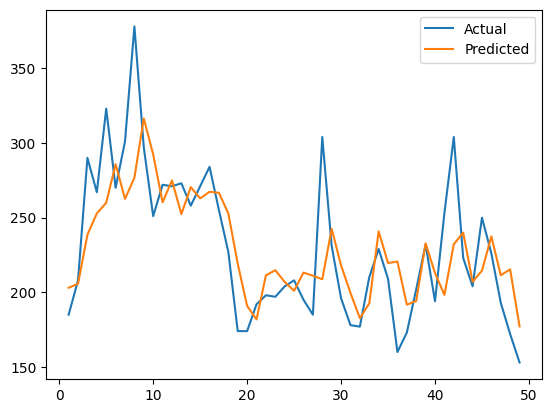

In [59]:
plt.plot(train_results['Actuals'][1:50], label='Actual')
plt.plot(train_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [60]:
val_predictions = model9.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Train Predictions':val_predictions, 'Actuals':y_val1})
val_results

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,Train Predictions,Actuals
0,88.550705,85.0
1,90.106537,71.0
2,85.134933,89.0
3,91.856552,99.0
4,95.900543,80.0
...,...,...
468,193.788055,193.0
469,226.545654,199.0
470,209.471344,197.0
471,207.545441,197.0


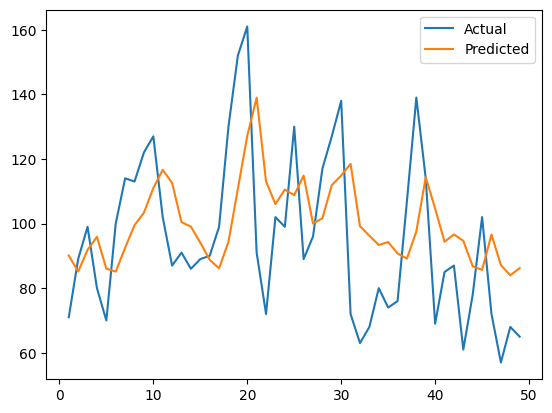

In [61]:
plt.plot(val_results['Actuals'][1:50], label='Actual')
plt.plot(val_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [62]:
test_predictions = model9.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Train Predictions':test_predictions, 'Actuals':y_test1})
test_results

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,Train Predictions,Actuals
0,204.931549,190.0
1,197.983887,177.0
2,192.301300,172.0
3,190.910980,170.0
4,186.233856,197.0
...,...,...
310,148.229095,134.0
311,143.929382,144.0
312,152.637207,155.0
313,161.387177,155.0


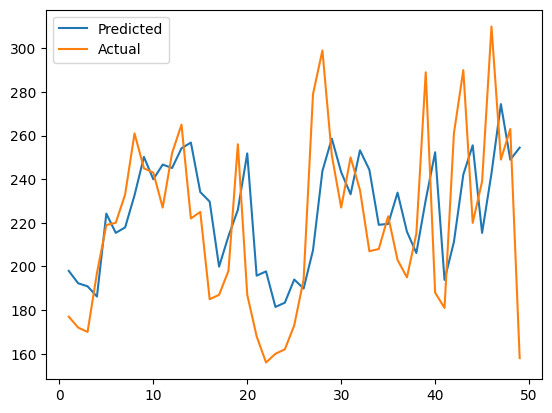

In [63]:
plt.plot(test_results['Train Predictions'][1:50], label='Predicted')
plt.plot(test_results['Actuals'][1:50], label='Actual')
plt.legend()
plt.show()